## Problem 1

Given the isochrone potential
\begin{equation}
\Phi(r) = - \frac{GM}{b + \sqrt{b^2 + r^2}}
\end{equation}

At small distances, ($r<<b$), we can approximate the potential by taylor expanding $\Phi(r)$ around $r=0$:
\begin{equation}
\Phi(r) \approx - \frac{GM}{2b} + \frac{GM}{8 b^3}r^2
\end{equation}

Note that this matches the form of a harmonic oscillator potential, $A + B r^2$, with $A = - \frac{GM}{2b}$ and $B =  \frac{GM}{8 b^3}$.

At large distances, ($r>>b$), we can approximate the isochrone potential by taking the limit as $\frac{r}{b}\to \infty$, i.e. as $\frac{b}{r}\to 0$

\begin{equation}
\lim_{\frac{b}{r}\to 0} -\frac{GM}{b + \sqrt{b^2 + r^2}} \\
= \lim_{\frac{b}{r}\to 0} -\frac{GM}{(\frac{b}{r} + \sqrt{\frac{b^2}{r^2} + 1})r} \\
= -\frac{GM}{r}
\end{equation}

Which is the point mass potential. Thus the isochrone potential behaves as a point mass potential for large r and a harmonic oscillator potential at small r.

## Problem 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import galpy

%matplotlib inline
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

In [2]:
from galpy.potential import MiyamotoNagaiPotential, NFWPotential, HernquistPotential

In [3]:
mp = MiyamotoNagaiPotential(a=0.5, b=0.0375, normalize=.6)
nfw = NFWPotential(a=4.5, normalize=.35)
hp = HernquistPotential(a=0.6/8,normalize=0.05)

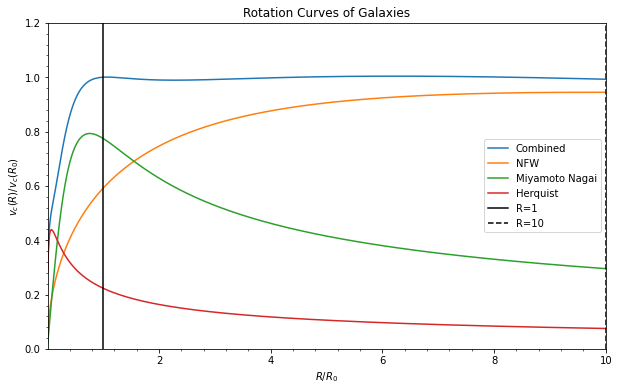

In [4]:
from galpy.potential import plotRotcurve
plotRotcurve(hp+mp+nfw,Rrange=[0.01,10.],grid=1001,yrange=[0.,1.2], label='Combined')
nfw.plotRotcurve(Rrange=[0.01,10.],grid=1001,overplot=True, label='NFW')
mp.plotRotcurve(Rrange=[0.01,10.],grid=1001,overplot=True, label='Miyamoto Nagai')
hp.plotRotcurve(Rrange=[0.01,10.],grid=1001,overplot=True, label='Herquist')
plt.axvline(1, label='R=1', color='k')
plt.axvline(10, linestyle='--', label='R=10', color='k')
plt.legend()
plt.title('Rotation Curves of Galaxies')
plt.show()


This shape seems to match the observed rotations (the dots) of the galaxies pretty well:

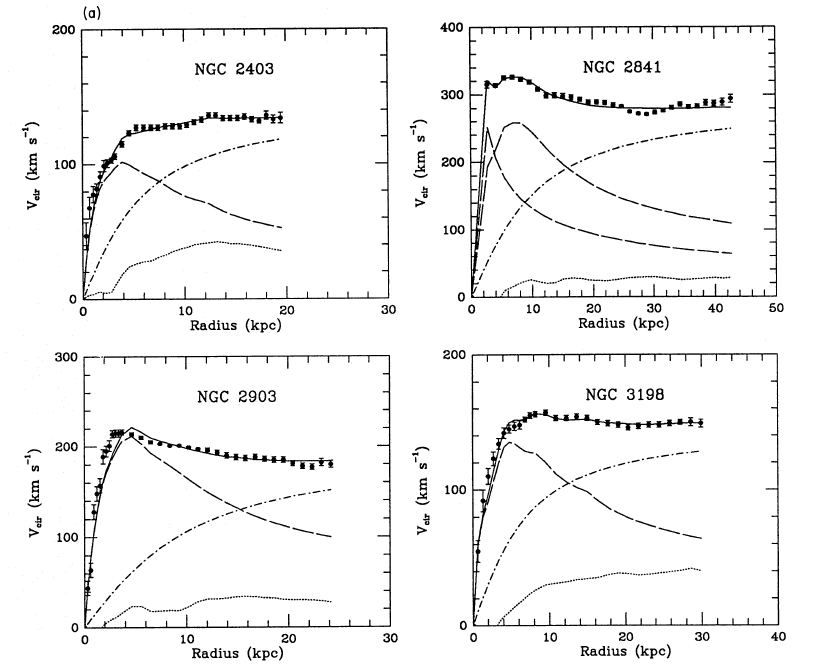

The potential at $R/R_0 = 1$ seems dominated by the Miyamoto Nagai Potential, which models the contribution of the disk. However at $R/R_0 = 10$, the potential seems to match the NFW Potential, which models the contribution from dark matter. Thus the match between our model and the observational data is evidence for the presence of dark matter.

## Problem 3

In [5]:
from galpy.potential import IsochronePotential
from galpy.orbit import Orbit


In [6]:
iso = IsochronePotential(normalize=True)

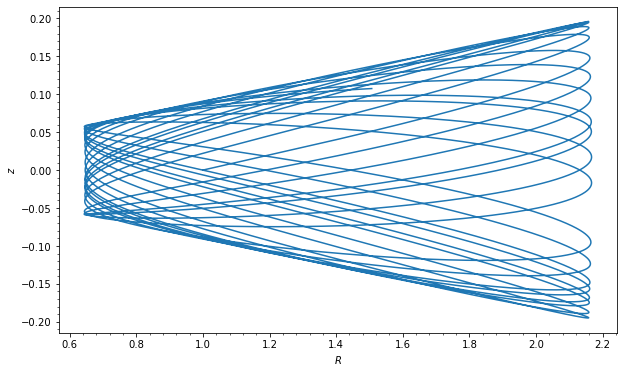

In [7]:
ts= np.linspace(0,100,10000)
R = 1
z = 0
vR = 1
vT = 1.1
vz = 0.1
o = Orbit([R,vR,vT,z,vz])
o.integrate(ts,iso, method='odeint')
o.plot()
plt.show()

The initial velocities for a circular orbit $(v_R, v_T, v_z)$ are $(0, 1, 0)$

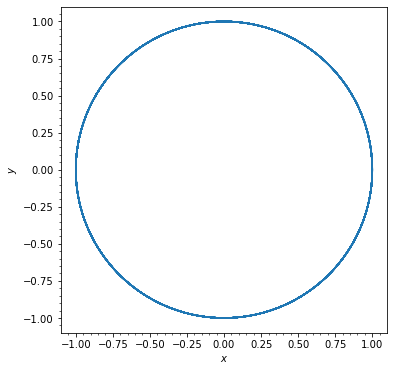

In [14]:
vz = 0.0
vR = 0
vT = 1
phi = 0
o = Orbit([R,vR,vT,z,vz, phi])
o.integrate(ts,iso,method='odeint')
o.plot(d1='x', d2='y')
plt.axis('square')
plt.show()